Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.



Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

For a challenge – what insights can you draw from the location information provided in the dataset?

Put together 2-3 slides summarising your most interesting findings to ANZ management.


### Summary of dataset

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

from datetime import datetime, timedelta

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("ANZdataset.csv",parse_dates=['date','extraction'],dayfirst=True)

In [3]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [4]:
df.sort_values(by='date')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
100,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,1403.55,2018-08-01,F,20,NaN,NaN,2018-08-01 17:00:00+00:00,1395.49,9767953f8ae94826aa145d6cac0be371,Australia,CUS-164374203,NaN,credit
99,posted,NaN,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,NaN,Daniel,1162.08,2018-08-01,M,22,NaN,NaN,2018-08-01 17:00:00+00:00,33.00,c539e04478c94bb2b48af6e0069a011b,Australia,CUS-1617121891,NaN,debit
98,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01 17:00:00+00:00,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,1244.45,2018-08-01,F,30,NaN,NaN,2018-08-01 17:00:00+00:00,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11948,authorized,1.0,NaN,ACC-964839203,AUD,146.92 -36.07,POS,010eb8c1-e8e2-46d6-8315-a670d7489eb3,NaN,Michael,42429.90,2018-10-31,M,21,Malvern,VIC,2018-10-31 10:55:11+00:00,45.95,e1eec8b692b34e03a595d18ef2480235,Australia,CUS-2059096722,145.03 -37.86,debit
11949,authorized,1.0,NaN,ACC-964839203,AUD,146.92 -36.07,POS,5c78a6f7-6d63-4b56-bd4a-8da9f39f9f2b,NaN,Michael,42397.78,2018-10-31,M,21,Port Douglas,QLD,2018-10-31 11:02:06+00:00,32.12,84cdbe46f8d9462f869b44379dd256b2,Australia,CUS-2059096722,145.46 -16.51,debit
11951,authorized,1.0,NaN,ACC-2249586092,AUD,115.98 -32.07,POS,e2ca89a0-af6b-4977-aec5-4775622aba6f,NaN,Edward,13000.93,2018-10-31,M,19,Mirrabooka,WA,2018-10-31 11:12:41+00:00,5.42,e132fa94bd36443cbe846d4cba2ce1d2,Australia,CUS-443776336,115.86 -31.87,debit
11944,authorized,0.0,NaN,ACC-1222300524,AUD,151.23 -33.94,SALES-POS,c517e9ce-fba4-4269-ac69-739d51ef969b,NaN,Michael,2375.47,2018-10-31,M,38,Armidale,NSW,2018-10-31 10:23:11+00:00,36.23,01b2fa3b2c304a2db74012bf84374177,Australia,CUS-2142601169,151.67 -30.52,debit


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             12043 non-null  object             
 1   card_present_flag  7717 non-null   float64            
 2   bpay_biller_code   885 non-null    object             
 3   account            12043 non-null  object             
 4   currency           12043 non-null  object             
 5   long_lat           12043 non-null  object             
 6   txn_description    12043 non-null  object             
 7   merchant_id        7717 non-null   object             
 8   merchant_code      883 non-null    float64            
 9   first_name         12043 non-null  object             
 10  balance            12043 non-null  float64            
 11  date               12043 non-null  datetime64[ns]     
 12  gender             12043 non-null  object     

In [6]:
df.describe(include='all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885,12043,12043,12043,12043,7717,883.0,12043,12043.000000,12043,12043,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3,100,1,100,6,5725,NaN,80,NaN,91,2,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,NaN,2018-09-28 00:00:00,M,NaN,Melbourne,NSW,2018-09-03 11:00:00+00:00,NaN,09229b99371c4812b30ea901039bb64a,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883,578,12043,578,3934,14,NaN,746,NaN,174,6285,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-01 00:00:00,NaN,NaN,NaN,NaN,2018-08-01 01:01:15+00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-31 00:00:00,NaN,NaN,NaN,NaN,2018-10-31 23:59:44+00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,14704.195553,NaN,NaN,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,31503.722652,NaN,NaN,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.240000,NaN,NaN,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3158.585000,NaN,NaN,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
df['merchant_code'].value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [8]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [9]:
df['bpay_biller_code'].value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

In [10]:
df['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [11]:
df['month'] = df['date'].dt.month

In [12]:
df['day'] = df['date'].dt.day

In [13]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,1
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,1
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,1
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,1
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31 23:09:06+00:00,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,10,31
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31 23:21:46+00:00,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,10,31
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31 23:34:25+00:00,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,10,31
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31 23:47:05+00:00,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,10,31


In [14]:
#df.to_csv("transform.csv",index=False)

### Data Visualization

### Univariate Data Exploration

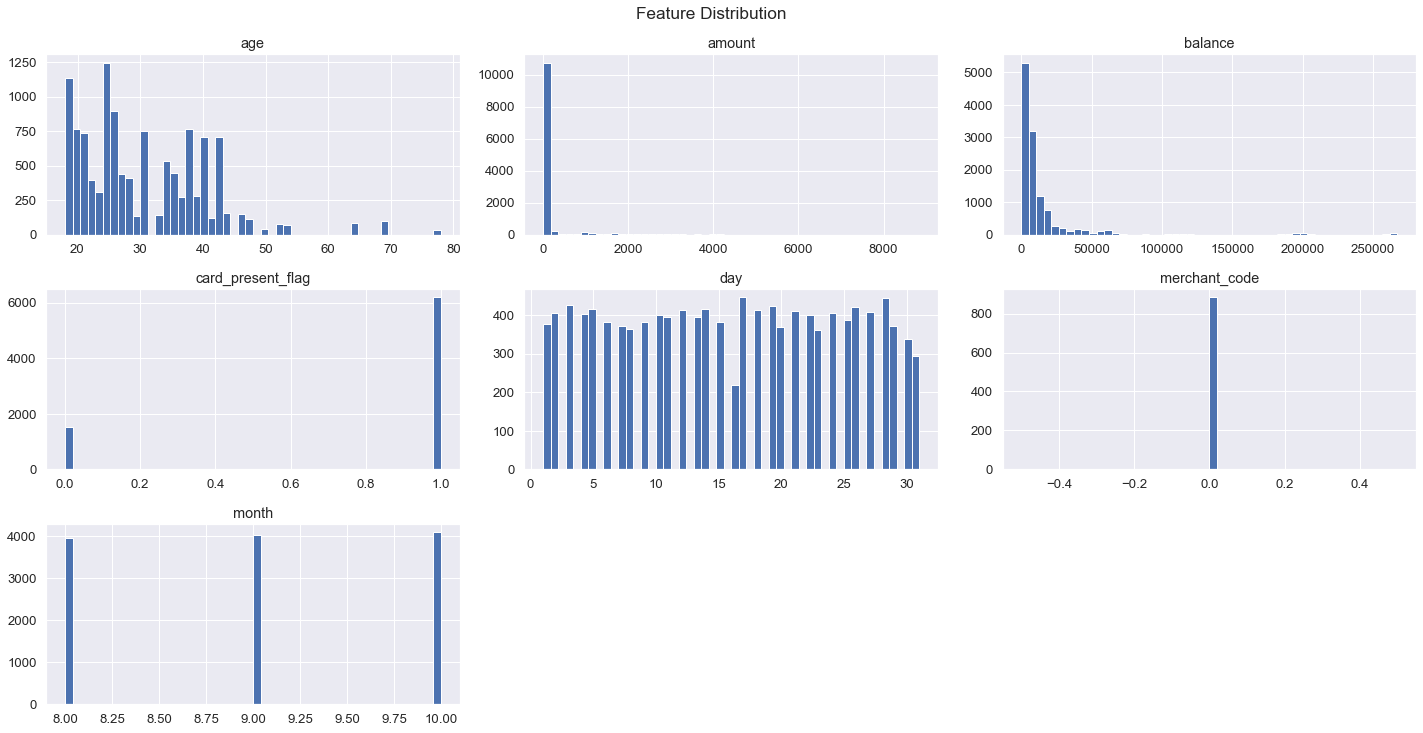

In [15]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

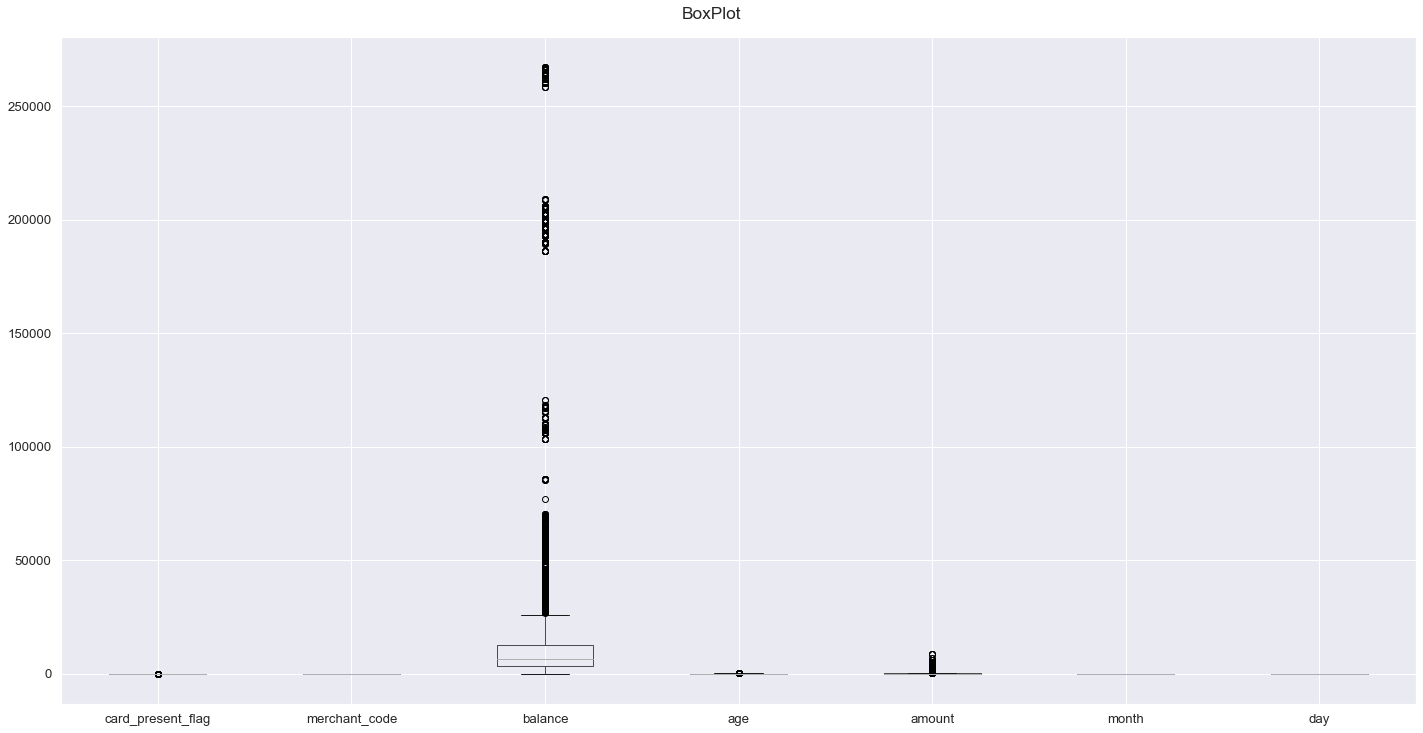

In [16]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

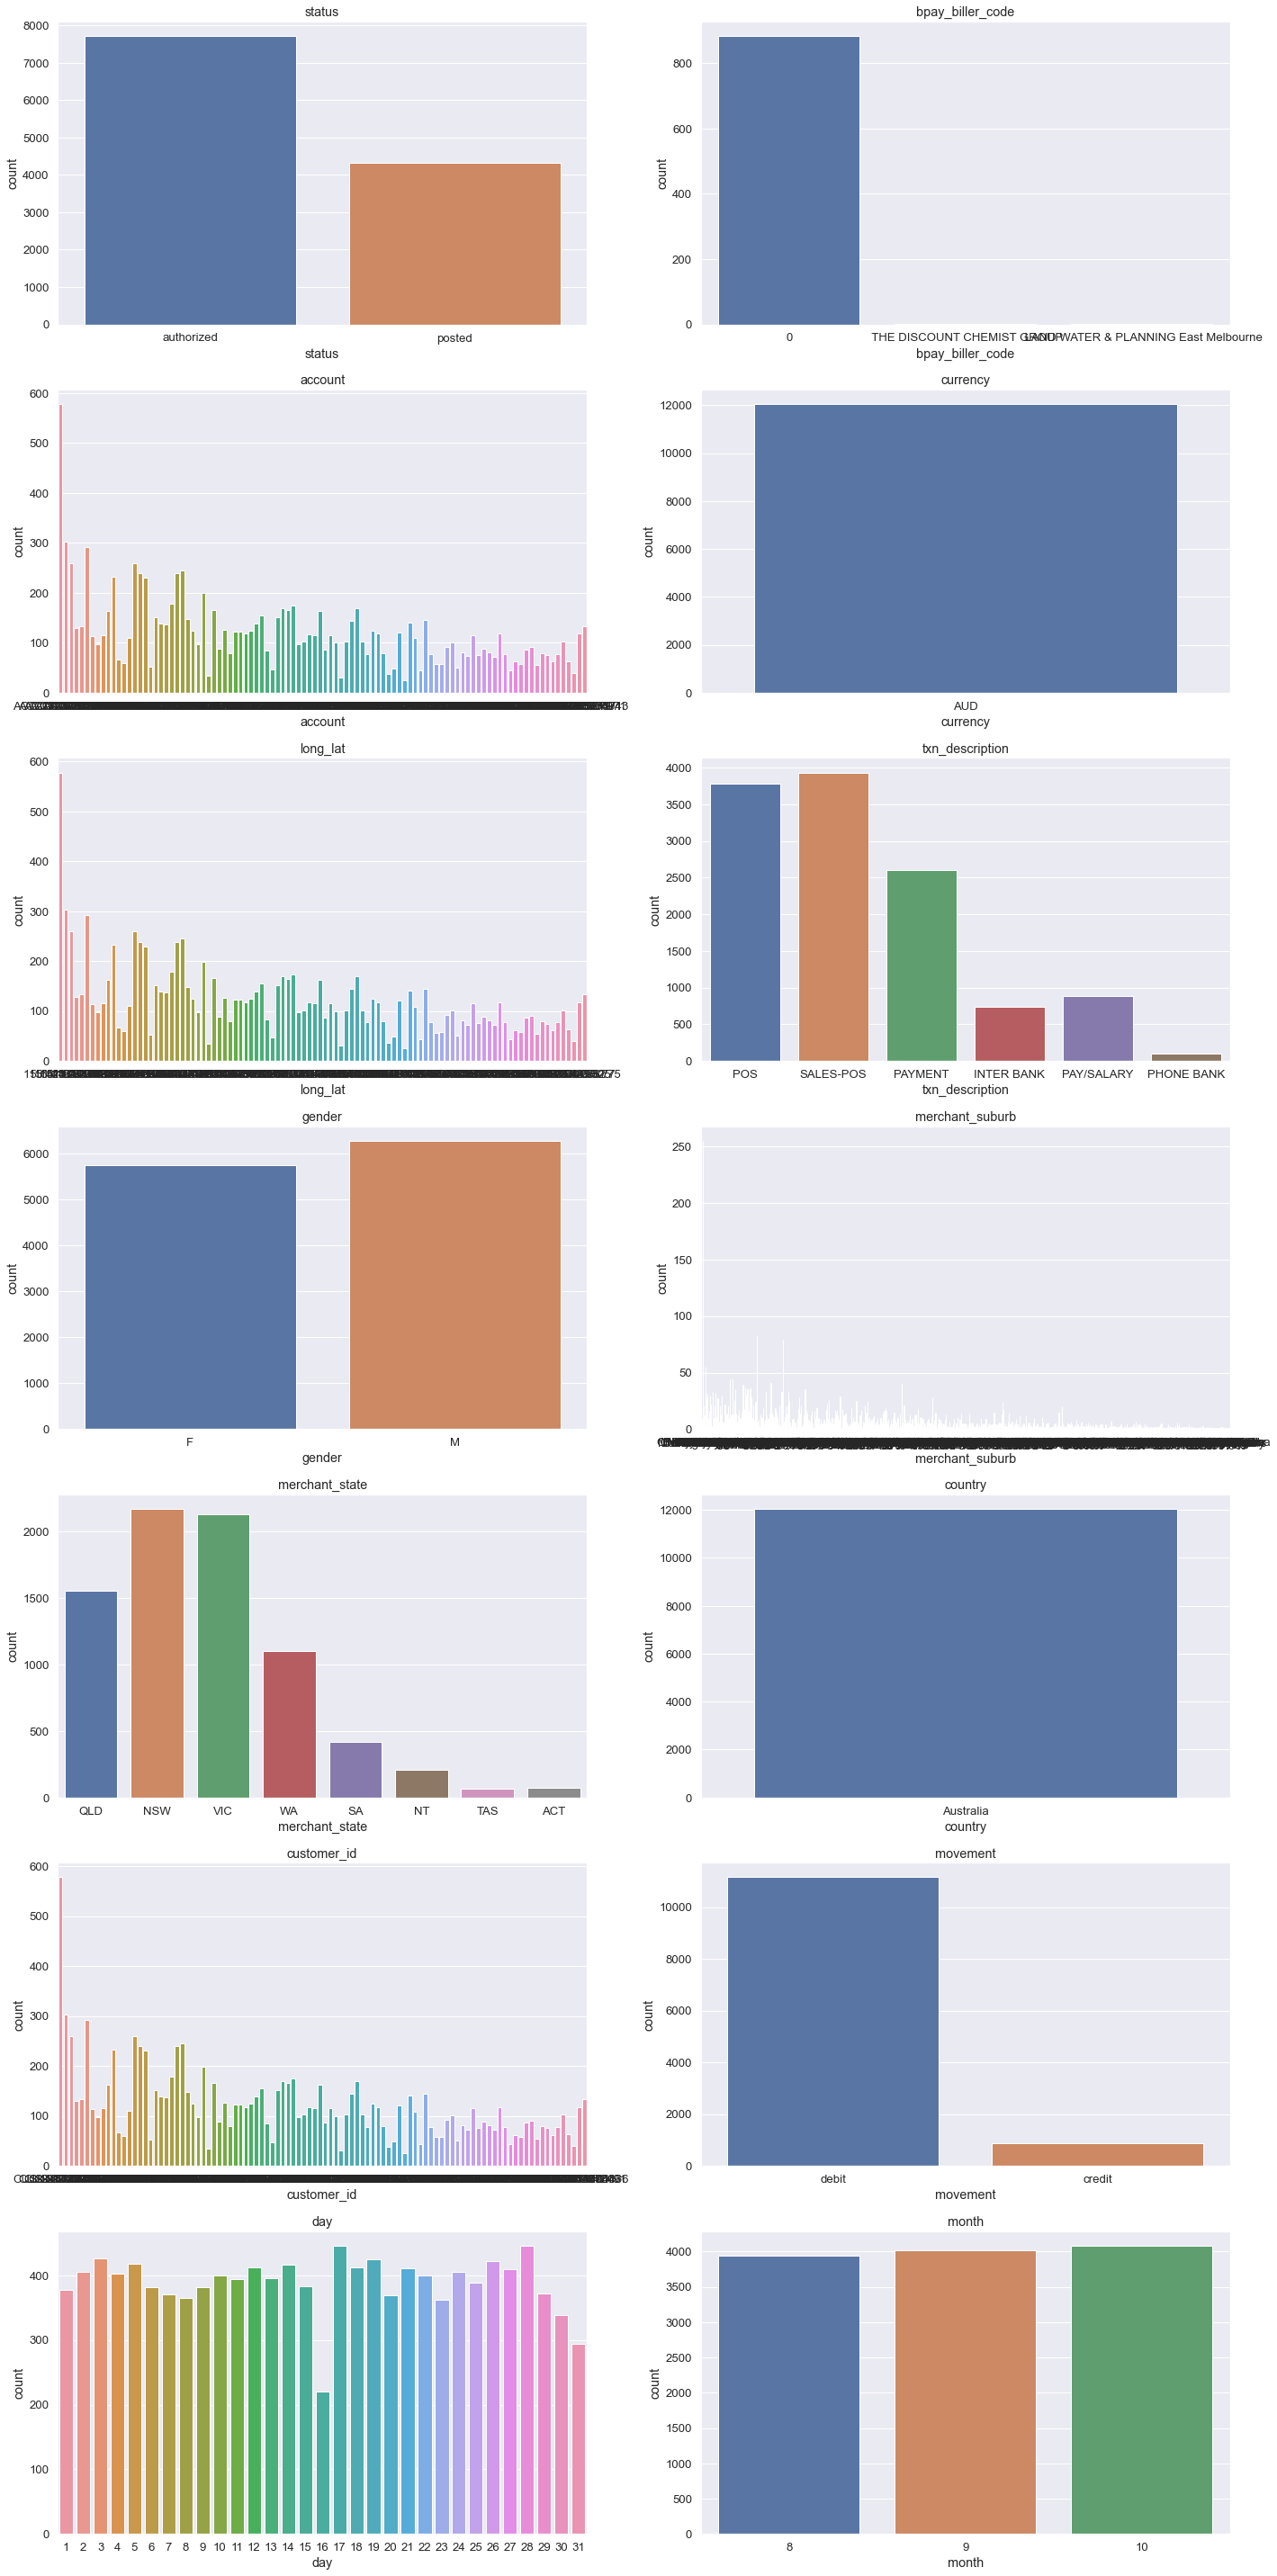

In [17]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("status")
sns.countplot(df.status)

plt.subplot(7,2,2)
plt.title("bpay_biller_code")
sns.countplot(df.bpay_biller_code)

plt.subplot(7,2,3)
plt.title("account")
sns.countplot(df.account)

plt.subplot(7,2,4)
plt.title("currency")
sns.countplot(df.currency)

plt.subplot(7,2,5)
plt.title("long_lat")
sns.countplot(df.long_lat)

plt.subplot(7,2,6)
plt.title("txn_description")
sns.countplot(df.txn_description)

plt.subplot(7,2,7)
plt.title("gender")
sns.countplot(df.gender)

plt.subplot(7,2,8)
plt.title("merchant_suburb")
sns.countplot(df.merchant_suburb)

plt.subplot(7,2,9)
plt.title("merchant_state")
sns.countplot(df.merchant_state)

plt.subplot(7,2,10)
plt.title("country")
sns.countplot(df.country)

plt.subplot(7,2,11)
plt.title("customer_id")
sns.countplot(df.customer_id)

plt.subplot(7,2,12)
plt.title("movement")
sns.countplot(df.movement)

plt.subplot(7,2,13)
plt.title("day")
sns.countplot(df.day)

plt.subplot(7,2,14)
plt.title("month")
sns.countplot(df.month)


plt.tight_layout()
plt.show()

### Time-Series Analysis

In [18]:
timeseries = df[['date','extraction','month', 'day']]

In [19]:
timeseries

,date,extraction,month,day
0,2018-08-01,2018-08-01 01:01:15+00:00,8,1
1,2018-08-01,2018-08-01 01:13:45+00:00,8,1
2,2018-08-01,2018-08-01 01:26:15+00:00,8,1
3,2018-08-01,2018-08-01 01:38:45+00:00,8,1
4,2018-08-01,2018-08-01 01:51:15+00:00,8,1
...,...,...,...,...
12038,2018-10-31,2018-10-31 23:09:06+00:00,10,31
12039,2018-10-31,2018-10-31 23:21:46+00:00,10,31
12040,2018-10-31,2018-10-31 23:34:25+00:00,10,31
12041,2018-10-31,2018-10-31 23:47:05+00:00,10,31


In [20]:
timeseries.iloc[12042] - timeseries.iloc[0]

date          91 days 00:00:00
extraction    91 days 22:58:29
month                        2
day                         30
dtype: object

In [21]:
timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   date        12043 non-null  datetime64[ns]     
 1   extraction  12043 non-null  datetime64[ns, UTC]
 2   month       12043 non-null  int64              
 3   day         12043 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int64(2)
memory usage: 376.5 KB


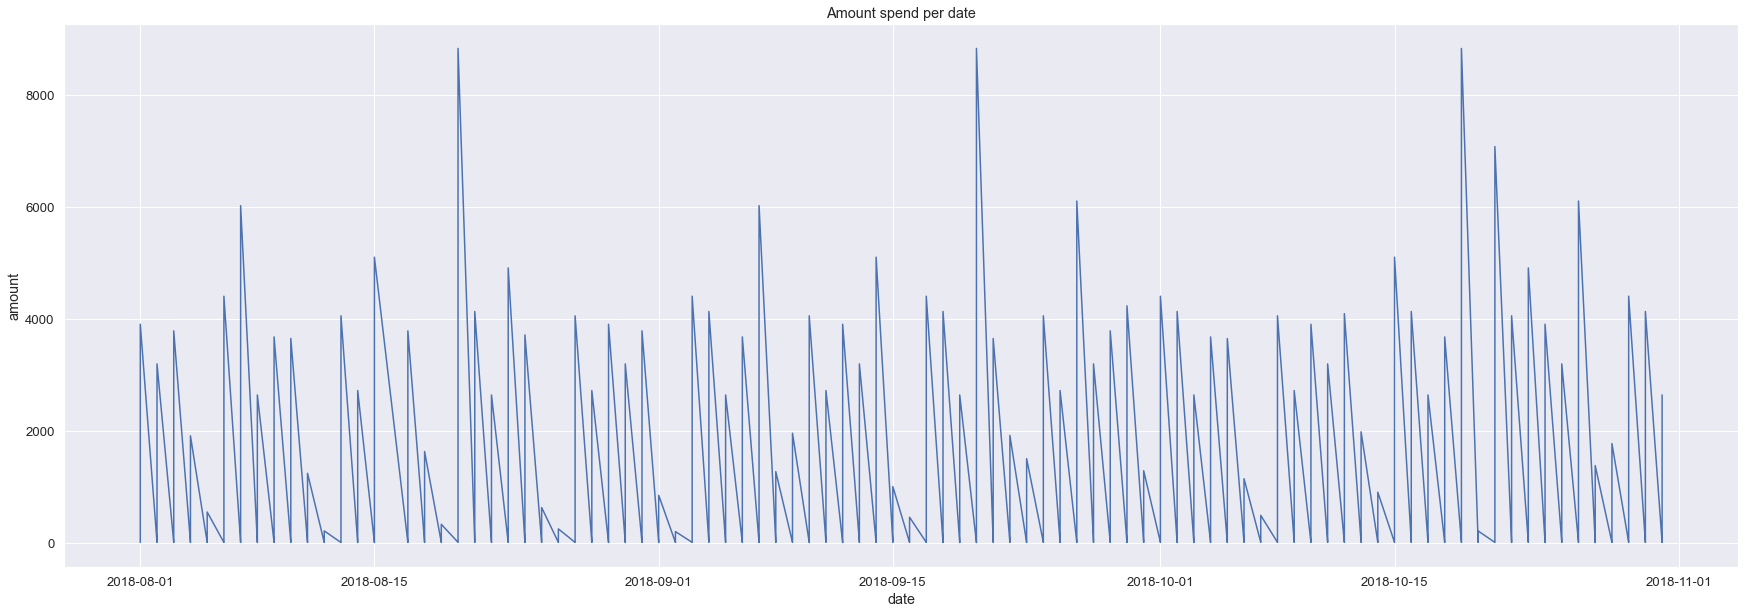

In [22]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
plt.title("Amount spend per date")
plt.show()

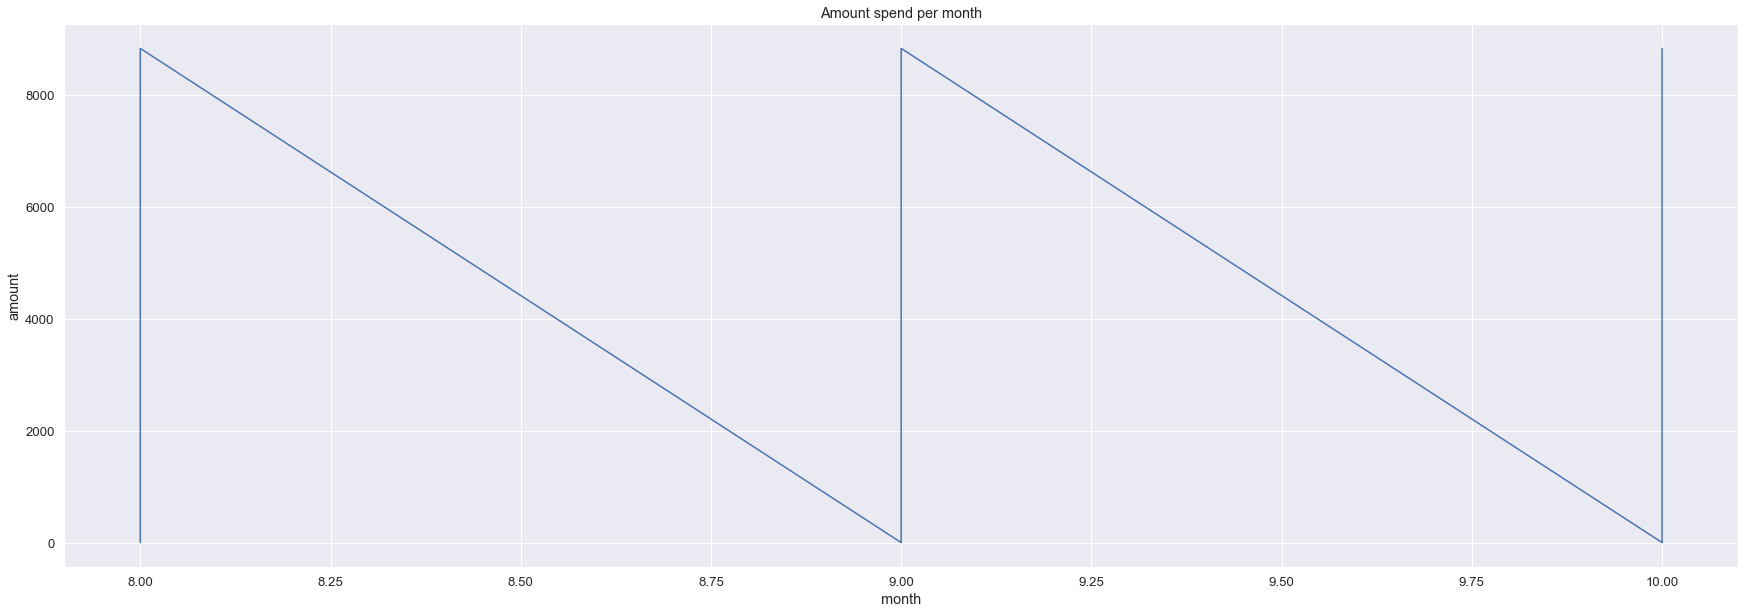

In [23]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
plt.title("Amount spend per month")
plt.show()

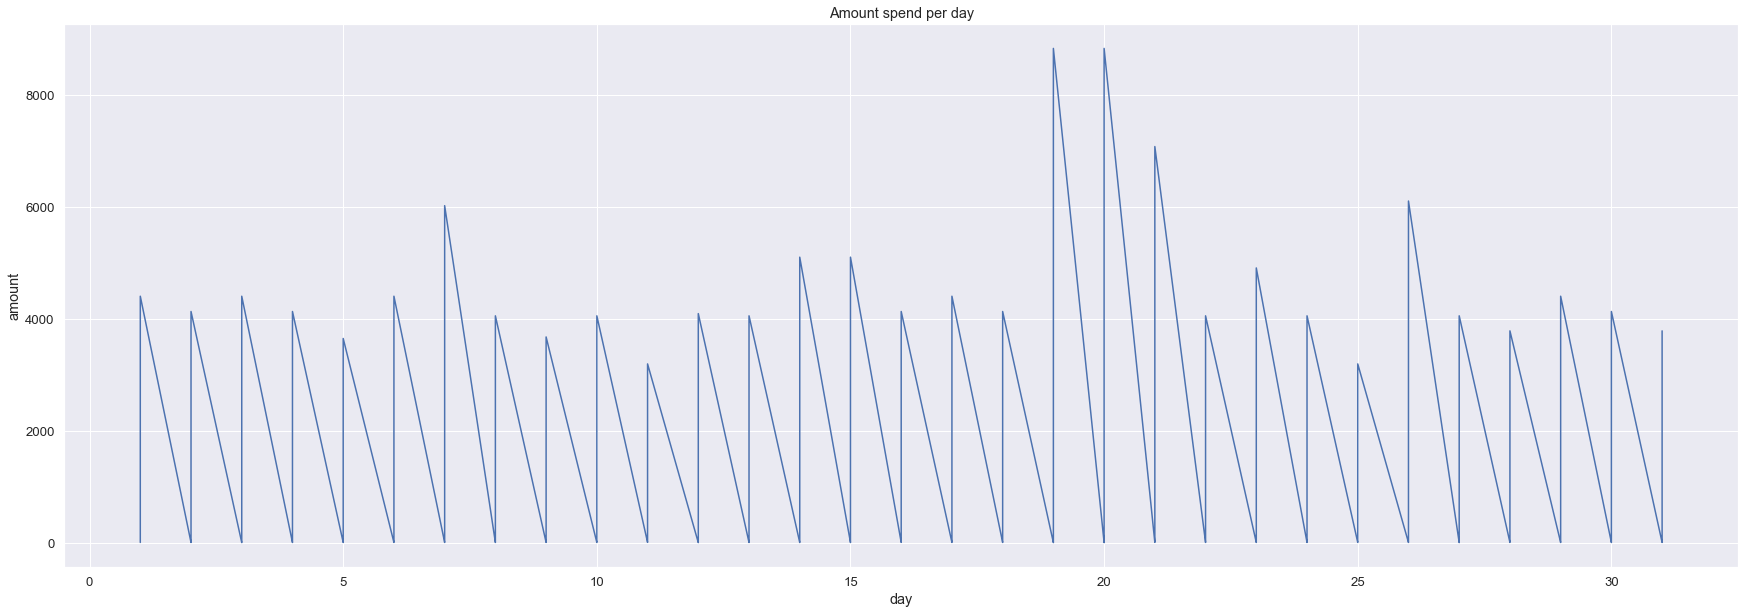

In [24]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.day,y=df.amount,data=df, estimator=None)
plt.title("Amount spend per day")
plt.show()

### Subset for Salary

In [25]:
salary = df[df['txn_description'] == 'PAY/SALARY']

In [26]:
salary

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01 11:00:00+00:00,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,8,1
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01 12:00:00+00:00,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,8,1
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01 12:00:00+00:00,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,8,1
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01 13:00:00+00:00,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,8,1
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01 13:00:00+00:00,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,9378.51,2018-10-31,M,26,NaN,NaN,2018-10-31 16:00:00+00:00,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,10,31
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,3440.01,2018-10-31,F,30,NaN,NaN,2018-10-31 17:00:00+00:00,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,10,31
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,2018-10-31 17:00:00+00:00,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,10,31
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,11454.52,2018-10-31,F,20,NaN,NaN,2018-10-31 17:00:00+00:00,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,10,31


In [27]:
salary.reset_index(inplace=True, drop=True)

In [28]:
salary

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,day
0,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,8342.11,2018-08-01,M,23,NaN,NaN,2018-08-01 11:00:00+00:00,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit,8,1
1,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,2040.58,2018-08-01,F,23,NaN,NaN,2018-08-01 12:00:00+00:00,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit,8,1
2,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,3158.51,2018-08-01,M,22,NaN,NaN,2018-08-01 12:00:00+00:00,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit,8,1
3,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,2517.66,2018-08-01,M,24,NaN,NaN,2018-08-01 13:00:00+00:00,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit,8,1
4,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,2271.79,2018-08-01,F,43,NaN,NaN,2018-08-01 13:00:00+00:00,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,9378.51,2018-10-31,M,26,NaN,NaN,2018-10-31 16:00:00+00:00,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit,10,31
879,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,3440.01,2018-10-31,F,30,NaN,NaN,2018-10-31 17:00:00+00:00,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit,10,31
880,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,11381.44,2018-10-31,M,69,NaN,NaN,2018-10-31 17:00:00+00:00,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit,10,31
881,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,11454.52,2018-10-31,F,20,NaN,NaN,2018-10-31 17:00:00+00:00,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit,10,31


In [29]:
#salary.to_csv("salary.csv",index=False)

### Groupby Method to find out salary

In [30]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   status             883 non-null    object             
 1   card_present_flag  0 non-null      float64            
 2   bpay_biller_code   883 non-null    object             
 3   account            883 non-null    object             
 4   currency           883 non-null    object             
 5   long_lat           883 non-null    object             
 6   txn_description    883 non-null    object             
 7   merchant_id        0 non-null      object             
 8   merchant_code      883 non-null    float64            
 9   first_name         883 non-null    object             
 10  balance            883 non-null    float64            
 11  date               883 non-null    datetime64[ns]     
 12  gender             883 non-null    object         

In [31]:
salary.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat', 'movement', 'month', 'day'], dtype='object')

In [32]:
salary.drop(['card_present_flag', 'bpay_biller_code','currency', 'long_lat','merchant_id','date',
            'merchant_suburb', 'merchant_state','extraction','transaction_id', 'country',
            'customer_id', 'merchant_long_lat'],axis=1,inplace=True)

In [33]:
salary

,status,account,txn_description,merchant_code,first_name,balance,gender,age,amount,movement,month,day
0,posted,ACC-588564840,PAY/SALARY,0.0,Isaiah,8342.11,M,23,3903.95,credit,8,1
1,posted,ACC-1650504218,PAY/SALARY,0.0,Marissa,2040.58,F,23,1626.48,credit,8,1
2,posted,ACC-3326339947,PAY/SALARY,0.0,Eric,3158.51,M,22,983.36,credit,8,1
3,posted,ACC-3541460373,PAY/SALARY,0.0,Jeffrey,2517.66,M,24,1408.08,credit,8,1
4,posted,ACC-2776252858,PAY/SALARY,0.0,Kristin,2271.79,F,43,1068.04,credit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,ACC-1973887809,PAY/SALARY,0.0,Antonio,9378.51,M,26,1098.91,credit,10,31
879,posted,ACC-819621312,PAY/SALARY,0.0,Michele,3440.01,F,30,1158.15,credit,10,31
880,posted,ACC-2920611728,PAY/SALARY,0.0,Tyler,11381.44,M,69,1043.12,credit,10,31
881,posted,ACC-1799207998,PAY/SALARY,0.0,Susan,11454.52,F,20,1395.49,credit,10,31


In [34]:
salary.groupby(by=['account'], as_index=False).sum()

,account,merchant_code,balance,age,amount,month,day
0,ACC-1037050564,0.0,51472.20,520,11597.17,118,195
1,ACC-1056639002,0.0,298308.49,132,19170.06,54,108
2,ACC-1199531521,0.0,86898.05,364,26500.46,62,131
3,ACC-1217063613,0.0,13769.63,54,9727.24,19,52
4,ACC-1222300524,0.0,22826.60,494,13027.69,118,208
...,...,...,...,...,...,...,...
95,ACC-854938045,0.0,88169.32,196,17770.76,64,91
96,ACC-90814749,0.0,65301.33,210,13852.02,54,86
97,ACC-958000567,0.0,59807.25,238,24623.27,64,98
98,ACC-964839203,0.0,467645.22,273,20282.60,116,217


In [35]:
salary.groupby(by=['merchant_code'], as_index=False).sum()

,merchant_code,balance,age,amount,month,day
0,0.0,14342444.54,28814,1676576.85,7962,13992


In [36]:
salary.groupby(by=['status'], as_index=False).sum()

,status,merchant_code,balance,age,amount,month,day
0,posted,0.0,14342444.54,28814,1676576.85,7962,13992


In [37]:
salary.groupby(by=['txn_description'], as_index=False).sum()

,txn_description,merchant_code,balance,age,amount,month,day
0,PAY/SALARY,0.0,14342444.54,28814,1676576.85,7962,13992


In [38]:
salary.groupby(by=['movement'], as_index=False).sum()

,movement,merchant_code,balance,age,amount,month,day
0,credit,0.0,14342444.54,28814,1676576.85,7962,13992


Merchant code = 0 is same as posted same as PAY/SALARY same as movement credit

In [39]:
salary.groupby(by=['account','first_name','month','day'], as_index=False).sum()

,account,first_name,month,day,merchant_code,balance,age,amount
0,ACC-1037050564,Rhonda,8,6,0.0,1878.76,40,892.09
1,ACC-1037050564,Rhonda,8,13,0.0,2025.48,40,892.09
2,ACC-1037050564,Rhonda,8,20,0.0,2628.62,40,892.09
3,ACC-1037050564,Rhonda,8,27,0.0,3060.28,40,892.09
4,ACC-1037050564,Rhonda,9,3,0.0,3780.96,40,892.09
...,...,...,...,...,...,...,...,...
871,ACC-966140392,Joseph,8,31,0.0,4816.40,21,2572.91
872,ACC-966140392,Joseph,9,14,0.0,6919.34,21,2572.91
873,ACC-966140392,Joseph,9,28,0.0,9098.13,21,2572.91
874,ACC-966140392,Joseph,10,12,0.0,10156.85,21,2572.91


In [40]:
salary.groupby(by=['account','first_name'], as_index=False).mean()

,account,first_name,merchant_code,balance,age,amount,month,day
0,ACC-1037050564,Rhonda,0.0,3959.400000,40.0,892.09,9.076923,15.000000
1,ACC-1056639002,Michael,0.0,49718.081667,22.0,3195.01,9.000000,18.000000
2,ACC-1199531521,Billy,0.0,12414.007143,52.0,3785.78,8.857143,18.714286
3,ACC-1217063613,Kimberly,0.0,6884.815000,27.0,4863.62,9.500000,26.000000
4,ACC-1222300524,Michael,0.0,1755.892308,38.0,1002.13,9.076923,16.000000
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,0.0,12595.617143,28.0,2538.68,9.142857,13.000000
96,ACC-90814749,Christopher,0.0,10883.555000,35.0,2308.67,9.000000,14.333333
97,ACC-958000567,Sandra,0.0,8543.892857,34.0,3517.61,9.142857,14.000000
98,ACC-964839203,Michael,0.0,35972.709231,21.0,1560.20,8.923077,16.692308


Ronda's pay is per week:

Some are paid twice per month, some thrice per month!

<img src>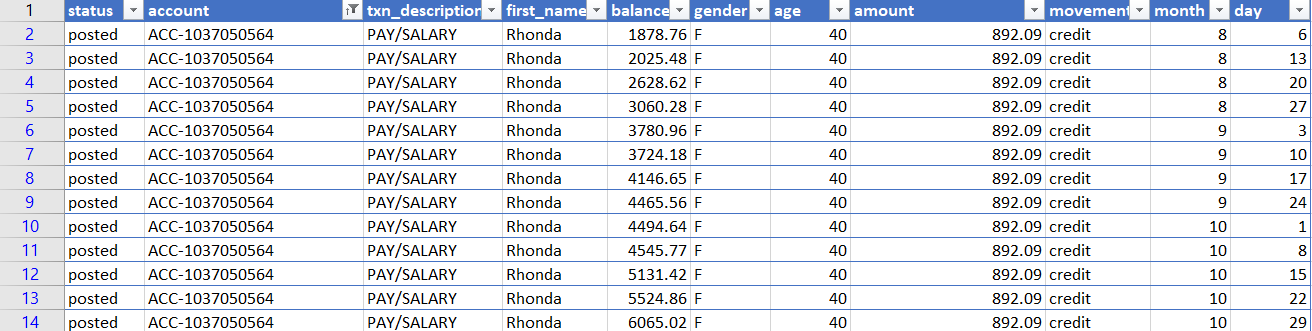

In [41]:
salary.groupby(by=['account','first_name','age'], as_index=False).mean()

,account,first_name,age,merchant_code,balance,amount,month,day
0,ACC-1037050564,Rhonda,40,0.0,3959.400000,892.09,9.076923,15.000000
1,ACC-1056639002,Michael,22,0.0,49718.081667,3195.01,9.000000,18.000000
2,ACC-1199531521,Billy,52,0.0,12414.007143,3785.78,8.857143,18.714286
3,ACC-1217063613,Kimberly,27,0.0,6884.815000,4863.62,9.500000,26.000000
4,ACC-1222300524,Michael,38,0.0,1755.892308,1002.13,9.076923,16.000000
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,0.0,12595.617143,2538.68,9.142857,13.000000
96,ACC-90814749,Christopher,35,0.0,10883.555000,2308.67,9.000000,14.333333
97,ACC-958000567,Sandra,34,0.0,8543.892857,3517.61,9.142857,14.000000
98,ACC-964839203,Michael,21,0.0,35972.709231,1560.20,8.923077,16.692308


In [42]:
#salary_df = salary.groupby(by=['account','first_name','age'], as_index=False).mean()

In [43]:
#salary_df

### Another way to create salary dataframe

In [44]:
salary

,status,account,txn_description,merchant_code,first_name,balance,gender,age,amount,movement,month,day
0,posted,ACC-588564840,PAY/SALARY,0.0,Isaiah,8342.11,M,23,3903.95,credit,8,1
1,posted,ACC-1650504218,PAY/SALARY,0.0,Marissa,2040.58,F,23,1626.48,credit,8,1
2,posted,ACC-3326339947,PAY/SALARY,0.0,Eric,3158.51,M,22,983.36,credit,8,1
3,posted,ACC-3541460373,PAY/SALARY,0.0,Jeffrey,2517.66,M,24,1408.08,credit,8,1
4,posted,ACC-2776252858,PAY/SALARY,0.0,Kristin,2271.79,F,43,1068.04,credit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
878,posted,ACC-1973887809,PAY/SALARY,0.0,Antonio,9378.51,M,26,1098.91,credit,10,31
879,posted,ACC-819621312,PAY/SALARY,0.0,Michele,3440.01,F,30,1158.15,credit,10,31
880,posted,ACC-2920611728,PAY/SALARY,0.0,Tyler,11381.44,M,69,1043.12,credit,10,31
881,posted,ACC-1799207998,PAY/SALARY,0.0,Susan,11454.52,F,20,1395.49,credit,10,31


In [45]:
salary.groupby(by=['account','first_name','age','gender'], as_index=False).agg({'balance':'sum','amount':'mean','month':'nunique','day':'nunique'})

,account,first_name,age,gender,balance,amount,month,day
0,ACC-1037050564,Rhonda,40,F,51472.20,892.09,3,13
1,ACC-1056639002,Michael,22,M,298308.49,3195.01,3,6
2,ACC-1199531521,Billy,52,M,86898.05,3785.78,3,7
3,ACC-1217063613,Kimberly,27,F,13769.63,4863.62,2,1
4,ACC-1222300524,Michael,38,M,22826.60,1002.13,3,13
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,2538.68,3,7
96,ACC-90814749,Christopher,35,M,65301.33,2308.67,3,6
97,ACC-958000567,Sandra,34,F,59807.25,3517.61,3,7
98,ACC-964839203,Michael,21,M,467645.22,1560.20,3,13


In [46]:
salary_df = salary.groupby(by=['account','first_name','age','gender'], as_index=False).agg({'balance':'sum','amount':'mean','month':'nunique','day':'count'})

In [47]:
salary_df

,account,first_name,age,gender,balance,amount,month,day
0,ACC-1037050564,Rhonda,40,F,51472.20,892.09,3,13
1,ACC-1056639002,Michael,22,M,298308.49,3195.01,3,6
2,ACC-1199531521,Billy,52,M,86898.05,3785.78,3,7
3,ACC-1217063613,Kimberly,27,F,13769.63,4863.62,2,2
4,ACC-1222300524,Michael,38,M,22826.60,1002.13,3,13
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,2538.68,3,7
96,ACC-90814749,Christopher,35,M,65301.33,2308.67,3,6
97,ACC-958000567,Sandra,34,F,59807.25,3517.61,3,7
98,ACC-964839203,Michael,21,M,467645.22,1560.20,3,13


### Calculate annual salary with assumptions: Full one year 2018 at work, no increments and bonuses, benefits-in-kind, misc claims/allowances. 

In [48]:
salary_df['annual'] = salary_df['amount'] * 52

In [49]:
salary_df

,account,first_name,age,gender,balance,amount,month,day,annual
0,ACC-1037050564,Rhonda,40,F,51472.20,892.09,3,13,46388.68
1,ACC-1056639002,Michael,22,M,298308.49,3195.01,3,6,166140.52
2,ACC-1199531521,Billy,52,M,86898.05,3785.78,3,7,196860.56
3,ACC-1217063613,Kimberly,27,F,13769.63,4863.62,2,2,252908.24
4,ACC-1222300524,Michael,38,M,22826.60,1002.13,3,13,52110.76
...,...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,2538.68,3,7,132011.36
96,ACC-90814749,Christopher,35,M,65301.33,2308.67,3,6,120050.84
97,ACC-958000567,Sandra,34,F,59807.25,3517.61,3,7,182915.72
98,ACC-964839203,Michael,21,M,467645.22,1560.20,3,13,81130.40


In [50]:
salary_df['months'] = salary_df['month'] * 4

In [51]:
salary_df['weekspayment'] = salary_df['day'] * 4

In [52]:
salary_df

,account,first_name,age,gender,balance,amount,month,day,annual,months,weekspayment
0,ACC-1037050564,Rhonda,40,F,51472.20,892.09,3,13,46388.68,12,52
1,ACC-1056639002,Michael,22,M,298308.49,3195.01,3,6,166140.52,12,24
2,ACC-1199531521,Billy,52,M,86898.05,3785.78,3,7,196860.56,12,28
3,ACC-1217063613,Kimberly,27,F,13769.63,4863.62,2,2,252908.24,8,8
4,ACC-1222300524,Michael,38,M,22826.60,1002.13,3,13,52110.76,12,52
...,...,...,...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,2538.68,3,7,132011.36,12,28
96,ACC-90814749,Christopher,35,M,65301.33,2308.67,3,6,120050.84,12,24
97,ACC-958000567,Sandra,34,F,59807.25,3517.61,3,7,182915.72,12,28
98,ACC-964839203,Michael,21,M,467645.22,1560.20,3,13,81130.40,12,52


In [53]:
salary_df.drop(['amount','month','day'],axis=1,inplace=True)

In [54]:
salary_df

,account,first_name,age,gender,balance,annual,months,weekspayment
0,ACC-1037050564,Rhonda,40,F,51472.20,46388.68,12,52
1,ACC-1056639002,Michael,22,M,298308.49,166140.52,12,24
2,ACC-1199531521,Billy,52,M,86898.05,196860.56,12,28
3,ACC-1217063613,Kimberly,27,F,13769.63,252908.24,8,8
4,ACC-1222300524,Michael,38,M,22826.60,52110.76,12,52
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,132011.36,12,28
96,ACC-90814749,Christopher,35,M,65301.33,120050.84,12,24
97,ACC-958000567,Sandra,34,F,59807.25,182915.72,12,28
98,ACC-964839203,Michael,21,M,467645.22,81130.40,12,52


In [55]:
salary_df.columns

Index(['account', 'first_name', 'age', 'gender', 'balance', 'annual', 'months', 'weekspayment'], dtype='object')

In [56]:
salary_df = salary_df[['account', 'first_name', 'age', 'gender', 'balance', 'months', 'weekspayment','annual']]

In [57]:
salary_df

,account,first_name,age,gender,balance,months,weekspayment,annual
0,ACC-1037050564,Rhonda,40,F,51472.20,12,52,46388.68
1,ACC-1056639002,Michael,22,M,298308.49,12,24,166140.52
2,ACC-1199531521,Billy,52,M,86898.05,12,28,196860.56
3,ACC-1217063613,Kimberly,27,F,13769.63,8,8,252908.24
4,ACC-1222300524,Michael,38,M,22826.60,12,52,52110.76
...,...,...,...,...,...,...,...,...
95,ACC-854938045,James,28,M,88169.32,12,28,132011.36
96,ACC-90814749,Christopher,35,M,65301.33,12,24,120050.84
97,ACC-958000567,Sandra,34,F,59807.25,12,28,182915.72
98,ACC-964839203,Michael,21,M,467645.22,12,52,81130.40


In [58]:
#salary_df.to_csv("salary3.csv",index=False)

### Pairplots

<Figure size 1440x1440 with 0 Axes>

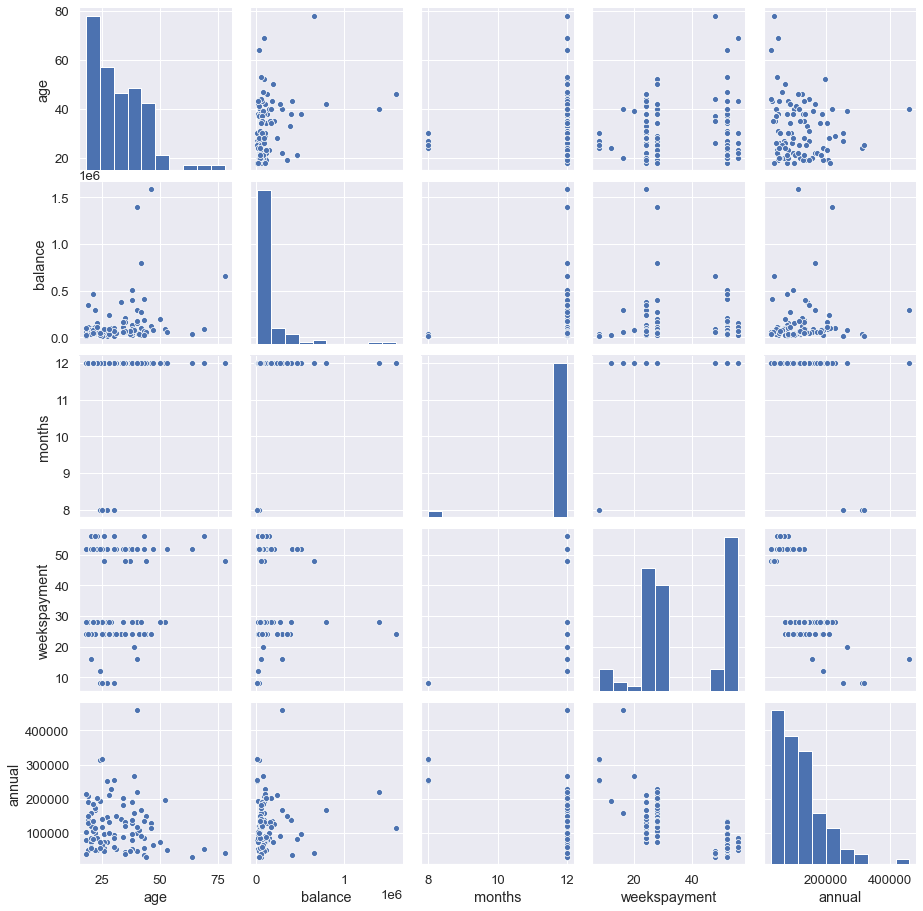

In [59]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(salary_df)
plt.show()

### Correlation

In [60]:
salary_df.corr()

,age,balance,months,weekspayment,annual
age,1.000000,0.289224,0.093653,0.182368,-0.135264
balance,0.289224,1.000000,0.107047,-0.013461,0.101847
months,0.093653,0.107047,1.000000,0.383716,-0.466623
weekspayment,0.182368,-0.013461,0.383716,1.000000,-0.696428
annual,-0.135264,0.101847,-0.466623,-0.696428,1.000000


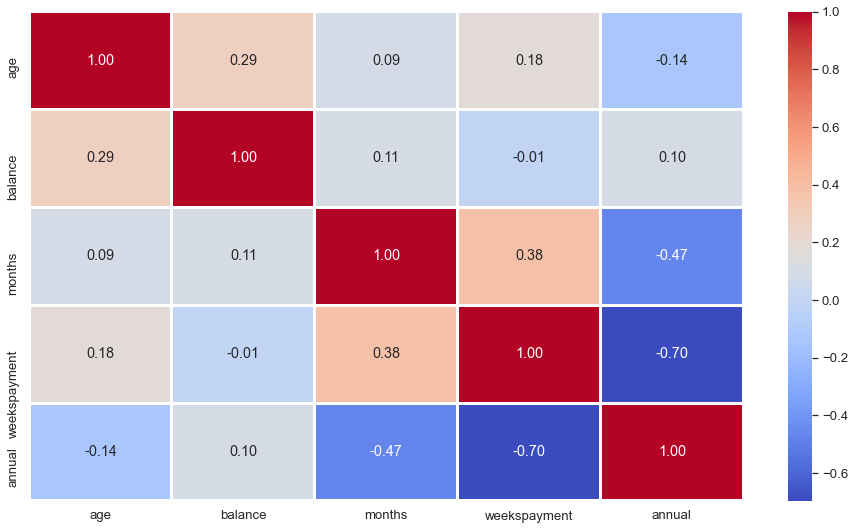

In [61]:
plt.figure(figsize=(16,9))
sns.heatmap(salary_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Create a pivot table

In [62]:
salary_table_sum = pd.pivot_table(data=salary,values='amount', index=['account','first_name'],columns='month',aggfunc='sum')

In [63]:
salary_table_sum

,month,8,9,10
account,first_name,,,
ACC-1037050564,Rhonda,3568.36,3568.36,4460.45
ACC-1056639002,Michael,6390.02,6390.02,6390.02
ACC-1199531521,Billy,11357.34,7571.56,7571.56
ACC-1217063613,Kimberly,NaN,4863.62,4863.62
ACC-1222300524,Michael,4008.52,4008.52,5010.65
...,...,...,...,...
ACC-854938045,James,5077.36,5077.36,7616.04
ACC-90814749,Christopher,4617.34,4617.34,4617.34
ACC-958000567,Sandra,7035.22,7035.22,10552.83


In [64]:
salary_table_mean = pd.pivot_table(data=salary,values='amount', index=['account','first_name'],columns='month',aggfunc='mean')

In [65]:
salary_table_mean

,month,8,9,10
account,first_name,,,
ACC-1037050564,Rhonda,892.09,892.09,892.09
ACC-1056639002,Michael,3195.01,3195.01,3195.01
ACC-1199531521,Billy,3785.78,3785.78,3785.78
ACC-1217063613,Kimberly,NaN,4863.62,4863.62
ACC-1222300524,Michael,1002.13,1002.13,1002.13
...,...,...,...,...
ACC-854938045,James,2538.68,2538.68,2538.68
ACC-90814749,Christopher,2308.67,2308.67,2308.67
ACC-958000567,Sandra,3517.61,3517.61,3517.61


In [66]:
salary_table_mean.to_csv("salary2.csv",index=False)

### Drop unwanted features (Back to original dataframe)

In [67]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account', 'currency', 'long_lat', 'txn_description', 'merchant_id', 'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction', 'amount', 'transaction_id', 'country', 'customer_id', 'merchant_long_lat', 'movement', 'month', 'day'], dtype='object')

In [68]:
df.drop(['bpay_biller_code', 'currency', 'long_lat', 'txn_description','merchant_id',
         'merchant_code', 'first_name','extraction','transaction_id', 'country', 'customer_id', 
         'merchant_long_lat'], axis=1,inplace=True)

In [69]:
df

,status,card_present_flag,account,balance,date,gender,age,merchant_suburb,merchant_state,amount,movement,month,day
0,authorized,1.0,ACC-1598451071,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,debit,8,1
1,authorized,0.0,ACC-1598451071,21.20,2018-08-01,F,26,Sydney,NSW,14.19,debit,8,1
2,authorized,1.0,ACC-1222300524,5.71,2018-08-01,M,38,Sydney,NSW,6.42,debit,8,1
3,authorized,1.0,ACC-1037050564,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,debit,8,1
4,authorized,1.0,ACC-1598451071,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,debit,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,14054.14,2018-10-31,F,30,Ringwood,VIC,9.79,debit,10,31
12039,authorized,1.0,ACC-1608363396,9137.79,2018-10-31,M,20,Casula,NSW,63.87,debit,10,31
12040,authorized,1.0,ACC-3827517394,45394.57,2018-10-31,M,28,Kings Park,NSW,43.96,debit,10,31
12041,authorized,1.0,ACC-2920611728,11350.67,2018-10-31,M,69,Oakleigh,VIC,30.77,debit,10,31


### Pairplots

<Figure size 1440x1440 with 0 Axes>

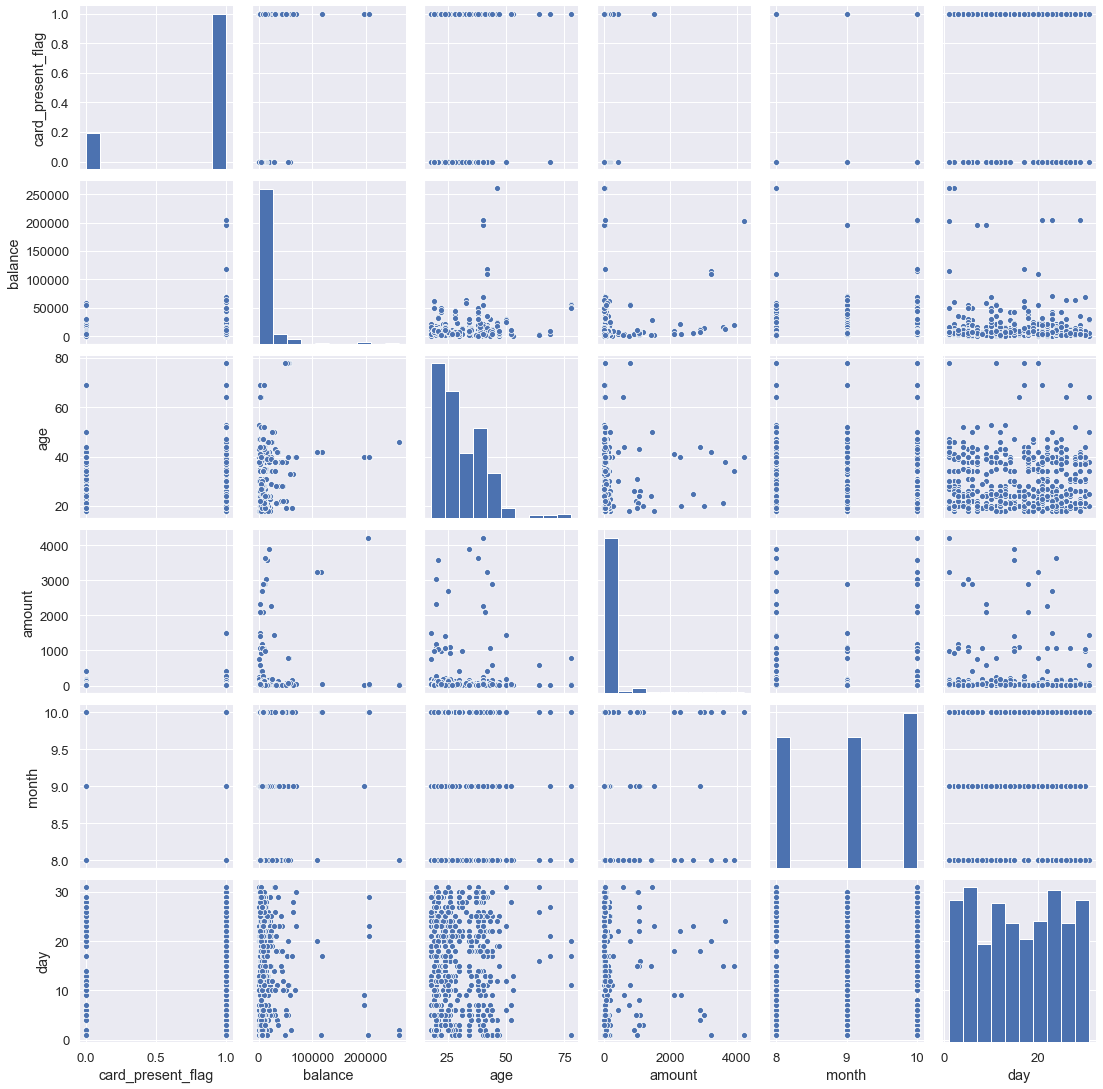

In [70]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df.sample(500))
plt.show()

### Bivariate Data Exploration

In [71]:
# plt.figure(figsize=(20,10))
# sns.barplot(x='merchant_suburb', y='amount',data=df, seed=0)
# plt.show()

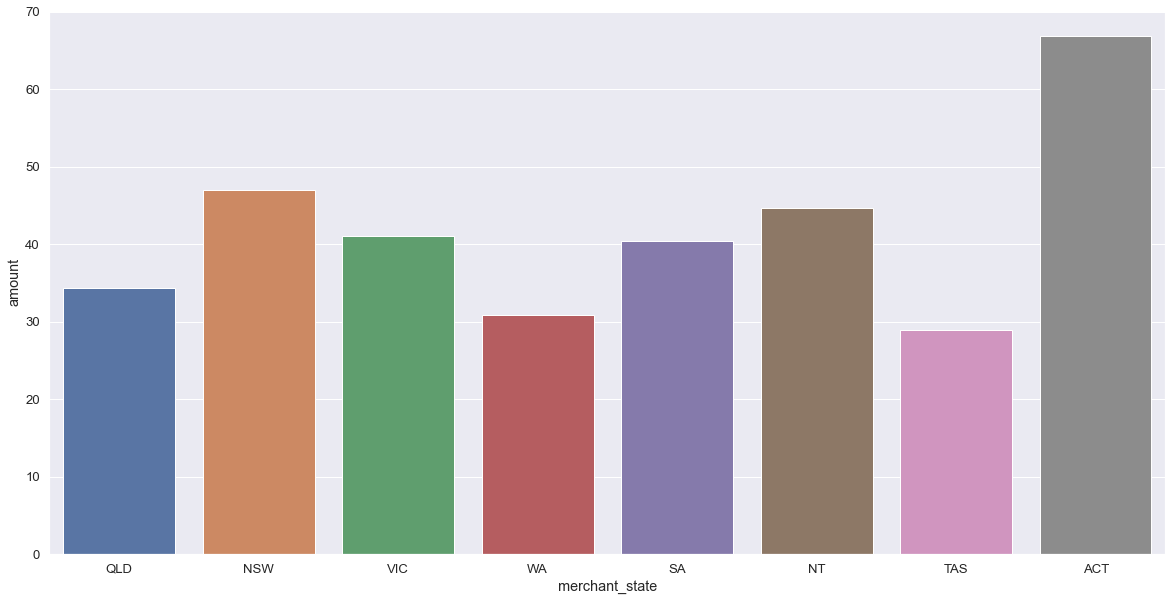

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x='merchant_state', y='amount',data=df, seed=0, ci=None)
plt.show()

### Correlation

In [73]:
df.corr()

,card_present_flag,balance,age,amount,month,day
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.001568,-0.004795
balance,0.005925,1.000000,0.199329,0.059178,0.099208,0.016902
age,-0.008405,0.199329,1.000000,0.029980,0.009923,-0.002528
amount,-0.002074,0.059178,0.029980,1.000000,0.007860,-0.001089
month,-0.001568,0.099208,0.009923,0.007860,1.000000,-0.012437
day,-0.004795,0.016902,-0.002528,-0.001089,-0.012437,1.000000


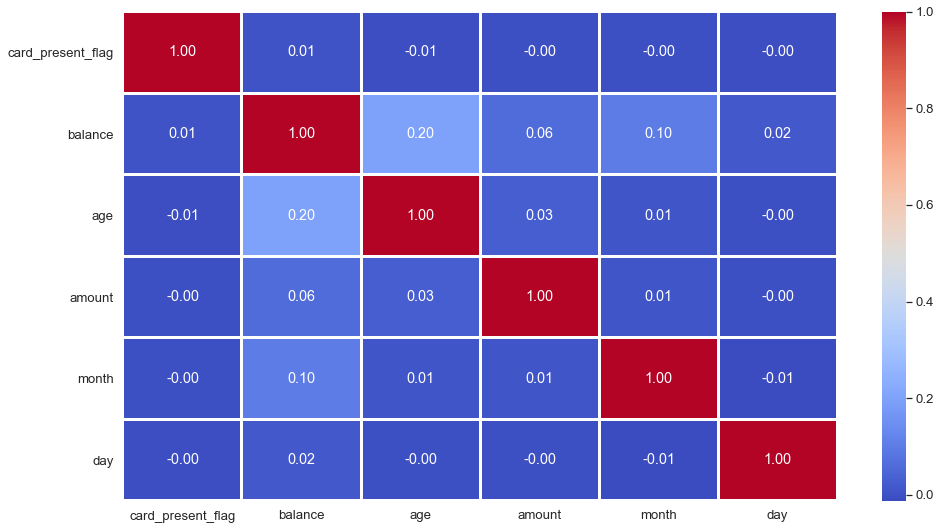

In [74]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [75]:
df.isnull().sum()

status                  0
card_present_flag    4326
account                 0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
amount                  0
movement                0
month                   0
day                     0
dtype: int64

In [76]:
df.columns

Index(['status', 'card_present_flag', 'account', 'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state', 'amount', 'movement', 'month', 'day'], dtype='object')

In [77]:
df.drop(['card_present_flag','merchant_suburb'],axis=1,inplace=True)

In [78]:
df.head()

,status,account,balance,date,gender,age,merchant_state,amount,movement,month,day
0,authorized,ACC-1598451071,35.39,2018-08-01,F,26,QLD,16.25,debit,8,1
1,authorized,ACC-1598451071,21.20,2018-08-01,F,26,NSW,14.19,debit,8,1
2,authorized,ACC-1222300524,5.71,2018-08-01,M,38,NSW,6.42,debit,8,1
3,authorized,ACC-1037050564,2117.22,2018-08-01,F,40,QLD,40.90,debit,8,1
4,authorized,ACC-1598451071,17.95,2018-08-01,F,26,QLD,3.25,debit,8,1


### Replacing values

In [79]:
df['merchant_state'] = df['merchant_state'].replace(to_replace=np.nan, value="MISSING")

In [80]:
df['merchant_state'].value_counts()

MISSING    4326
NSW        2169
VIC        2131
QLD        1556
WA         1100
SA          415
NT          205
ACT          73
TAS          68
Name: merchant_state, dtype: int64

In [81]:
#df.to_csv("clean.csv",index=False)

In [82]:
df.isnull().sum()

status            0
account           0
balance           0
date              0
gender            0
age               0
merchant_state    0
amount            0
movement          0
month             0
day               0
dtype: int64

### Groupby Method

In [83]:
df

,status,account,balance,date,gender,age,merchant_state,amount,movement,month,day
0,authorized,ACC-1598451071,35.39,2018-08-01,F,26,QLD,16.25,debit,8,1
1,authorized,ACC-1598451071,21.20,2018-08-01,F,26,NSW,14.19,debit,8,1
2,authorized,ACC-1222300524,5.71,2018-08-01,M,38,NSW,6.42,debit,8,1
3,authorized,ACC-1037050564,2117.22,2018-08-01,F,40,QLD,40.90,debit,8,1
4,authorized,ACC-1598451071,17.95,2018-08-01,F,26,QLD,3.25,debit,8,1
...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,ACC-3021093232,14054.14,2018-10-31,F,30,VIC,9.79,debit,10,31
12039,authorized,ACC-1608363396,9137.79,2018-10-31,M,20,NSW,63.87,debit,10,31
12040,authorized,ACC-3827517394,45394.57,2018-10-31,M,28,NSW,43.96,debit,10,31
12041,authorized,ACC-2920611728,11350.67,2018-10-31,M,69,VIC,30.77,debit,10,31


In [84]:
df.groupby(by="account").sum()

,balance,age,amount,month,day
account,,,,,
ACC-1037050564,862838.94,10360,19286.44,2317,3748
ACC-1056639002,3985131.11,1892,22801.59,752,1265
ACC-1199531521,782534.75,4004,32243.17,678,1449
ACC-1217063613,112828.72,675,10652.72,243,328
ACC-1222300524,360961.30,11514,23696.45,2738,5074
...,...,...,...,...,...
ACC-854938045,1900729.89,4732,26521.55,1526,2666
ACC-90814749,1181204.72,4340,20818.80,1103,1812
ACC-958000567,1182440.21,5916,36588.25,1572,2737


In [85]:
df.groupby(by=["account","age","month"], as_index=False).agg({'balance':'sum','amount':'sum','status':'count','merchant_state':'count'})

,account,age,month,balance,amount,status,merchant_state
0,ACC-1037050564,40,8,169213.60,6372.97,88,88
1,ACC-1037050564,40,9,357070.88,6404.11,97,97
2,ACC-1037050564,40,10,336554.46,6509.36,74,74
3,ACC-1056639002,22,8,1537121.73,7782.58,36,36
4,ACC-1056639002,22,9,1707572.61,7950.86,36,36
...,...,...,...,...,...,...,...
295,ACC-964839203,21,9,1417218.56,9513.52,40,40
296,ACC-964839203,21,10,1669335.97,7560.49,41,41
297,ACC-966140392,21,8,175116.73,10157.68,67,67
298,ACC-966140392,21,9,245675.45,6549.48,37,37


### Treat Duplicate Values

In [86]:
df.duplicated(keep='first').sum()

0

### Linear Regression

In [87]:
salary_df.columns

Index(['account', 'first_name', 'age', 'gender', 'balance', 'months', 'weekspayment', 'annual'], dtype='object')

In [88]:
y = salary_df['annual']
x1 = salary_df['age']

In [89]:
x = sm.add_constant(x1)

In [90]:
results = sm.OLS(y,x).fit()

In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 annual   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.826
Date:                Tue, 22 Sep 2020   Prob (F-statistic):              0.180
Time:                        21:58:17   Log-Likelihood:                -1259.9
No. Observations:                 100   AIC:                             2524.
Df Residuals:                      98   BIC:                             2529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.465e+05   2.13e+04      6.882      0.000    1.04e+05    1.89e+05
age         -851.6465    630.166     -1.351      0.180   -2102.190     398.897
==============================================================================
Omnibus:                       46.206   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.009
Skew:                           1.666   Prob(JB):                     9.69e-29
Kurtosis:                       7.456   Cond. No.                         99.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""